<a href="https://colab.research.google.com/github/sandhya-8368/Cardiovascular-Risk-Prediction/blob/main/Copy_of_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team(Data Newbies)
##### **Team Member 1 -**Ranjita Raj
##### **Team Member 2 -**Rohit Raj
##### **Team Member 3 -**Sandhyarani Patra


# **Project Summary -**

The heart is one of the main organs of the human body. The heart plays the most crucial role in the circulatory system. If the heart does not function properly then it will lead to serious health conditions including death. Cardiovascular diseases (CVDs) are the leading cause of death globally, according to WHO, an estimated 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities. Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and in some cases, even death. As a result, it is critical that we accurately predict the risk of heart disease in order to avoid as many fatalities as possible. The dataset provides the patients’ information. It includes 3390 records and 17 columns. There are demographic, behavioural and medical risk factors. From that dataset we derived various insights that helped us know the weightage of each feature and how they are interrelated. The goal of this project is to develop a classification model that can predict if a patient is at risk of coronary heart disease (CHD) over the period of 10 years, based on demographic, lifestyle, and medical history.


**Step 1** : First understanding the dataset, did some basic inspection on the raw data to check the number of columns also checked distribution of data and statistics of the data in each variable. checked and dealt with missing values, Visualized the distributions and boxplots of each variable to handle the outliers, Cleaning the data.

**Step** **2** : With the help of Exploratory Data Analysis we derived some meaningful results by doing univariate, bivariate and multivariate analysis.

**Step 3** : After EDA we went on to visualize the severity of multicollinearity. Removed multicollinearity based on VIF factor. Scaled the data and started experimenting different algorithms.

**Step 4** : we used Four Machine Learning models : Logistic Regression,  K-Nearest Neighbors, Support Vector Machine and Naive Bayes. After training each model and tuning their hyper-parameters using grid search , we compared the performance of the models using different Evaluation Metrics.



# **GitHub Link -**

https://github.com/sandhya-8368/Cardiovascular-Risk-Prediction/blob/main/Copy_of_Cardiovascular_Risk_Prediction.ipynb

# **Problem Statement**


### The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts.
### The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.



# Data Description
## Demographic:


* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)






# Behavioral:


*   is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
*   Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)




# Medical( history):


  • BP Meds: whether or not the patient was on blood pressure medication(Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous) Predict variable (desired target)
  



##10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -dependent variable

# ***Let's Begin !***

# Mounting google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


# Importing important libraries

In [ ]:
# importing pandas for data reading and manipulations
# numpy for linear algebra
# seaborn and matplotlib for visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import resample

#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
     
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

### Dataset First View

In [ ]:
df.head(5)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Summary of Numerical Features
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.shape

(3390, 17)



##    From the data set we can see that there are 3390 rows and 17 columns.






In [ ]:
#checking for duplicate values
len(df[df.duplicated()])

0

### There are no duplicate values

# Checking for NULL Values

In [ ]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Null values are present in education,cigsPerDay,BPMeds,totChol,BMI,heartRate,glucose columns.

In [ ]:
#Calculating the percentage of null values
c=df.isnull().sum()/df['id'].count() * 100
c

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

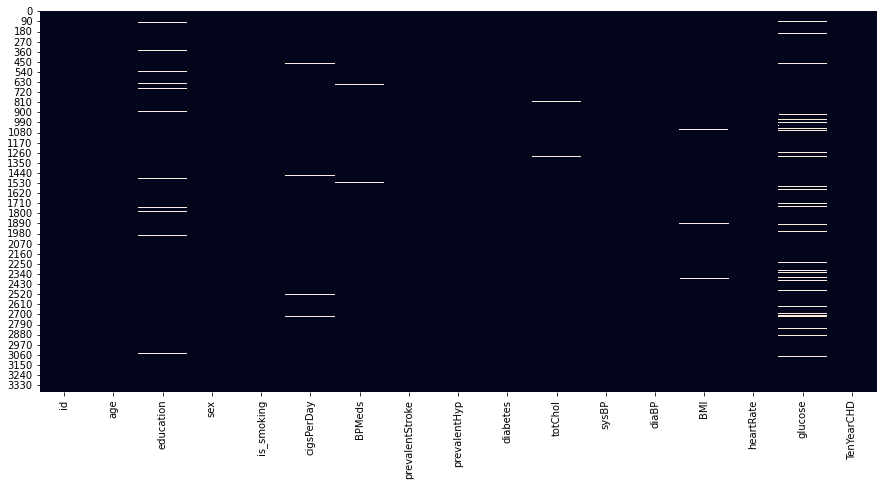

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Replacing null values with the median
for col in ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']:
  df[col] = df[col].fillna(df[col].median())

In [ ]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Exploratory Data Analysis

### Distribution of the dependent variable

In [ ]:
# Let us check the majority and minority set of the target variable
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

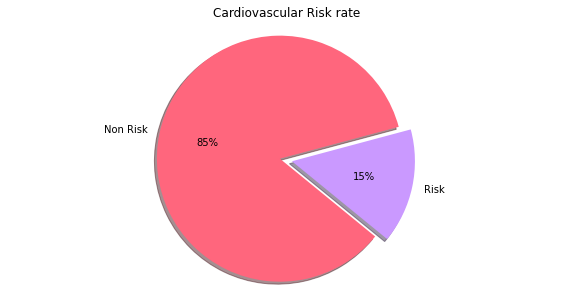

In [ ]:
# Let us plot the majority and minority set of the target variable
labels = 'Non Risk',"Risk"
my_colors = ['#ff667d','#ca99ff']
my_explode = (0,0.1)
plt.figure(figsize=(10,5))
plt.pie(df['TenYearCHD'].value_counts(), labels=labels ,autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode )
plt.title("Cardiovascular Risk rate")
plt.axis('equal')
plt.show()



*   from the pie chart we can see that 85% people comes under Non risk category. 
*   And 15% people comes under Risk category. 



# Distribution of the continuous independent variables

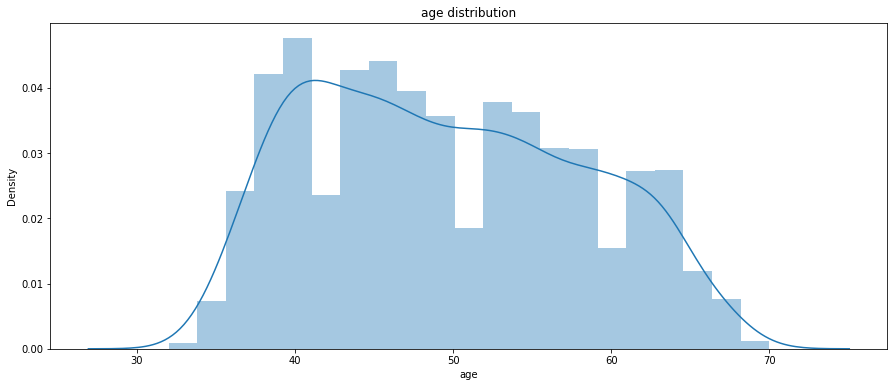

In [ ]:
# Distribution of values of numerical features
# distribution of age
plt.figure(figsize=(15,6))
sns.distplot(df['age'])
plt.title('age distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['age'].skew()))
print("Kurtosis: {}".format(df['age'].kurt()))

Skew: 0.2257958756715891
Kurtosis: -1.0048018900322173


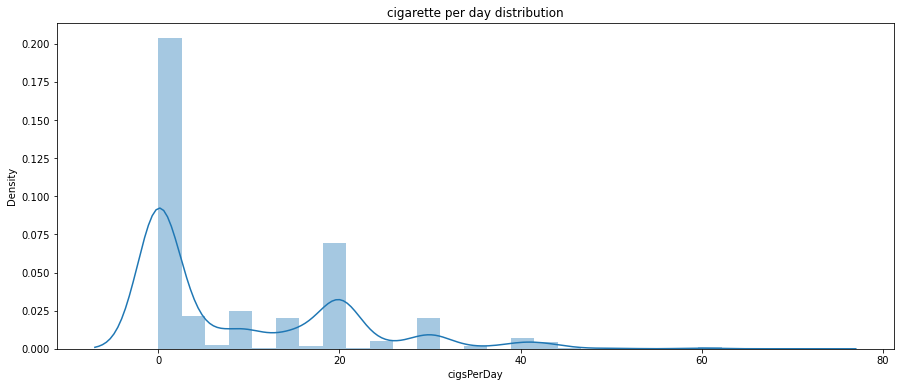

In [ ]:
# distribution of cigsPerDay
plt.figure(figsize=(15,6))
sns.distplot(df['cigsPerDay'])
plt.title('cigarette per day distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['cigsPerDay'].skew()))
print("Kurtosis: {}".format(df['cigsPerDay'].kurt()))

Skew: 1.232049026922511
Kurtosis: 0.997915628526477


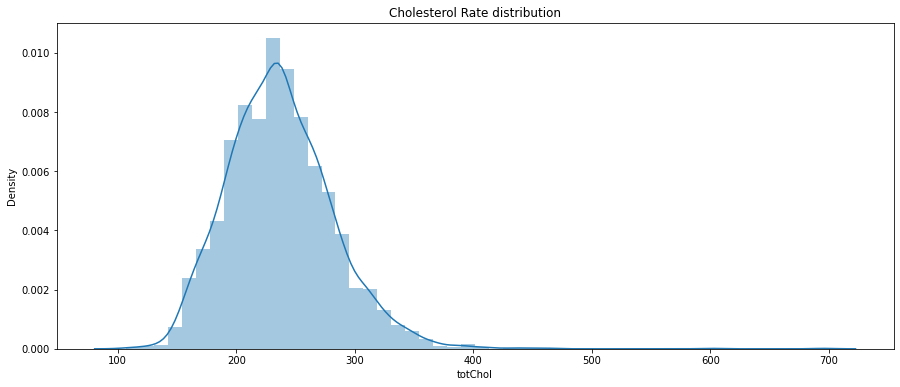

In [ ]:
# distribution of TotalChol
plt.figure(figsize=(15,6))
sns.distplot(df['totChol'])
plt.title('Cholesterol Rate distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['totChol'].skew()))
print("Kurtosis: {}".format(df['totChol'].kurt()))

Skew: 0.9481697283287832
Kurtosis: 4.8715537608834945


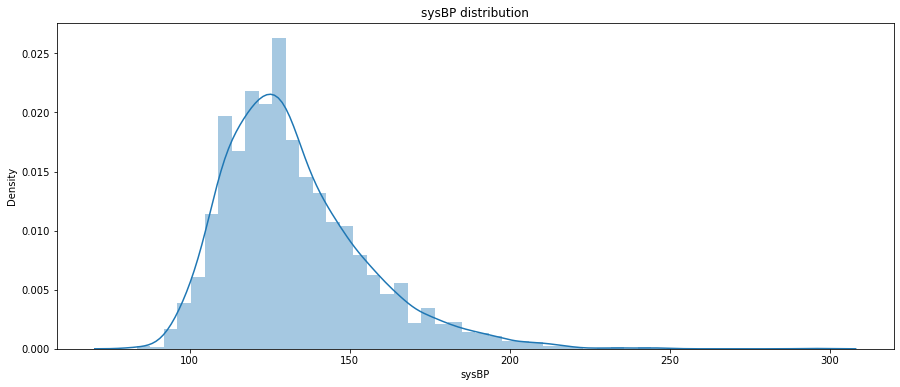

In [ ]:
# distribution of sysBP
plt.figure(figsize=(15,6))
sns.distplot(df['sysBP'])
plt.title('sysBP distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['sysBP'].skew()))
print("Kurtosis: {}".format(df['sysBP'].kurt()))

Skew: 1.1758367309612197
Kurtosis: 2.3659224984054052


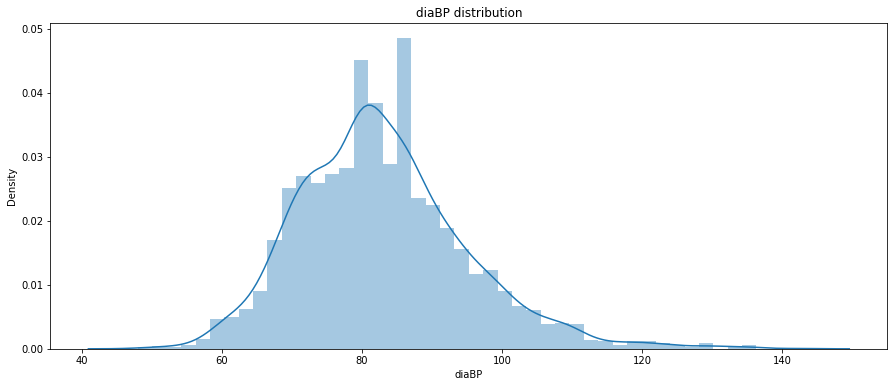

In [ ]:
# distribution of diaBP
plt.figure(figsize=(15,6))
sns.distplot(df['diaBP'])
plt.title('diaBP distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['diaBP'].skew()))
print("Kurtosis: {}".format(df['diaBP'].kurt()))

Skew: 0.7181726683579213
Kurtosis: 1.2739949650851914


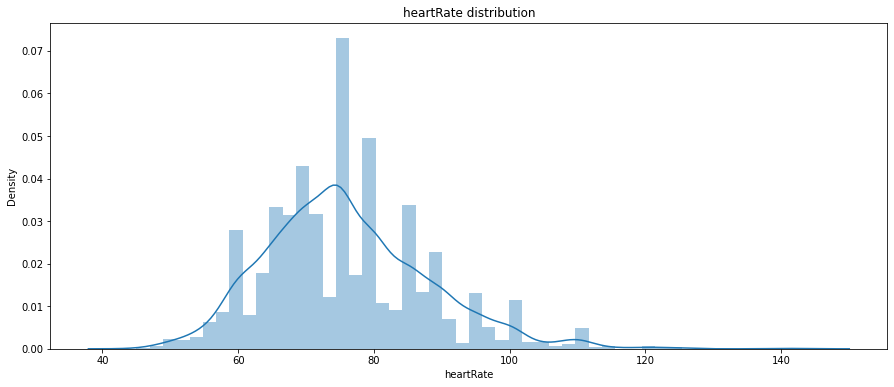

In [ ]:
# distribution of heart rate
plt.figure(figsize=(15,6))
sns.distplot(df['heartRate'])
plt.title('heartRate distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['heartRate'].skew()))
print("Kurtosis: {}".format(df['heartRate'].kurt()))

Skew: 0.6766595704100932
Kurtosis: 0.9808673195764235


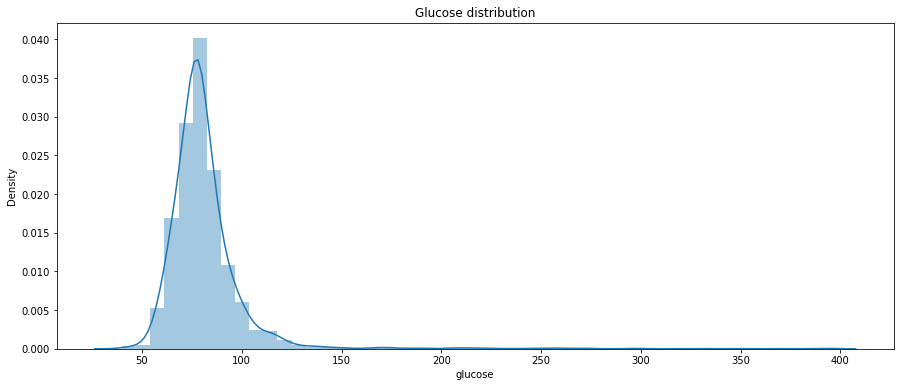

In [ ]:
# distribution of glucose
plt.figure(figsize=(15,6))
sns.distplot(df['glucose'])
plt.title('Glucose distribution')
plt.show()

In [ ]:
print("Skew: {}".format(df['glucose'].skew()))
print("Kurtosis: {}".format(df['glucose'].kurt()))

Skew: 6.462107922831296
Kurtosis: 63.36501804612405


### **Most of the numerical features are skewed and contains outliers.**

# Distribution of the discrete independent variables

In [ ]:
# creating a list that contains all the categorical features
categorical_columns = [i for i in df.columns if len(df[i].unique())<10]

categorical_columns.remove('TenYearCHD') 
# dropping the target variable i.e. TenYearCHD
print(list(categorical_columns))
# creating a list that contains all the numerical features
numerical_columns  = [i for i in df.columns if len(df[i].unique())>25]
print(list(numerical_columns))
     

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Dropping the id columnn as it is useless 
df.drop(columns=['id'], inplace=True)

In [ ]:
for feature in categorical_columns:
    print(feature,':')
    print(df[feature].value_counts())
    print("................")

education :
1.0    1391
2.0    1077
3.0     549
4.0     373
Name: education, dtype: int64
................
sex :
F    1923
M    1467
Name: sex, dtype: int64
................
is_smoking :
NO     1703
YES    1687
Name: is_smoking, dtype: int64
................
BPMeds :
0.0    3290
1.0     100
Name: BPMeds, dtype: int64
................
prevalentStroke :
0    3368
1      22
Name: prevalentStroke, dtype: int64
................
prevalentHyp :
0    2321
1    1069
Name: prevalentHyp, dtype: int64
................
diabetes :
0    3303
1      87
Name: diabetes, dtype: int64
................


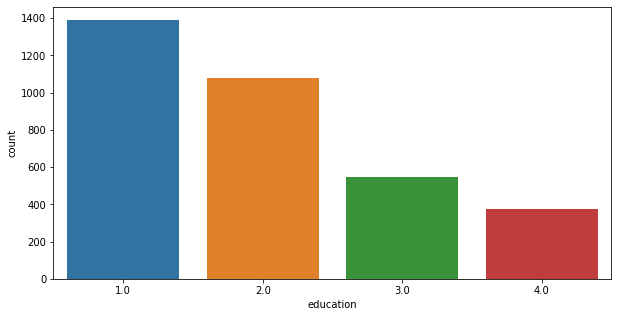

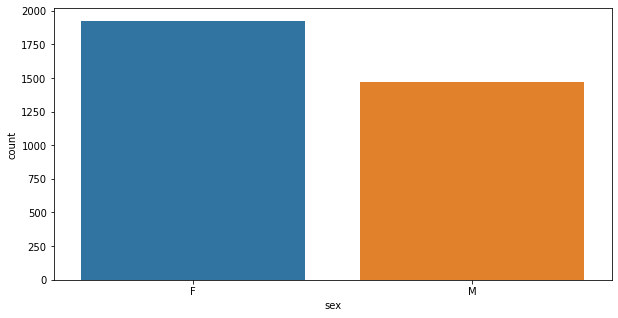

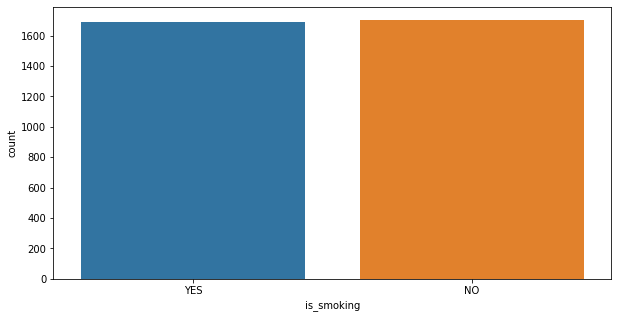

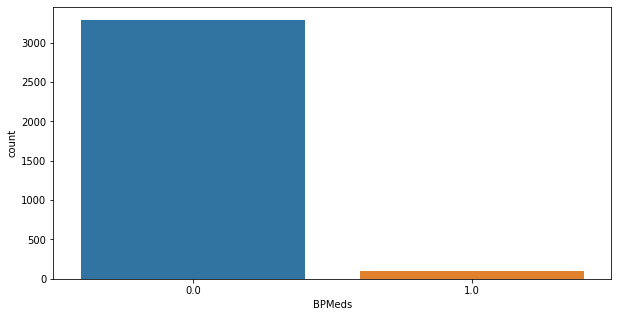

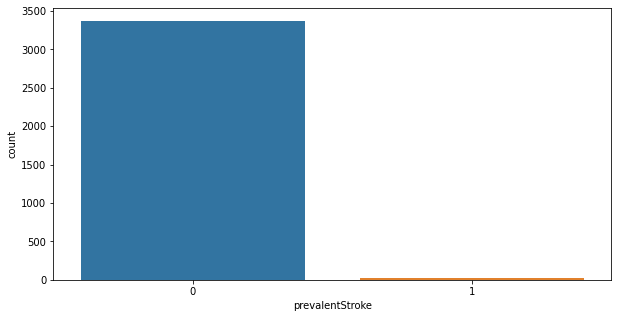

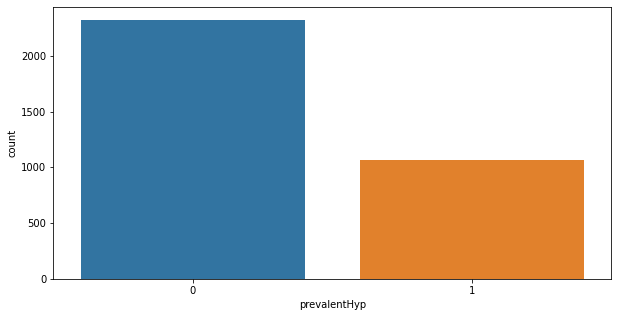

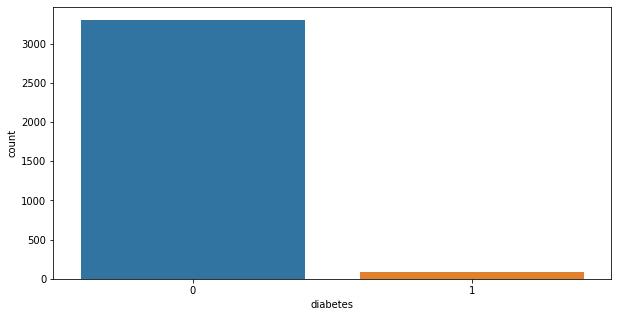

In [ ]:
categorical_columns
for col in categorical_columns:
  plt.figure(figsize = (10,5))
  sns.countplot(df[col])
  plt.show()



*   Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
*   Female numbers are more than Male numbers.

*   Smokers and Non Smokers numbers are almost equals.
*   Number of people who were not on BPmeds, who did not had a stroke in past, and who are dont have diastolic blood pressure are very less.





# Analysing Outliers

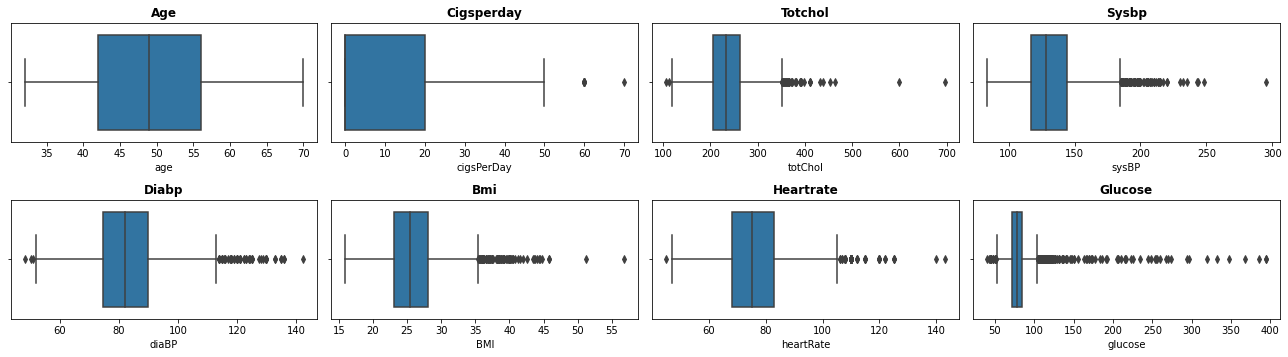

In [ ]:
plt.figure(figsize=(18,12))
for n,column in enumerate(numerical_columns):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# Removing Outliers

In [ ]:
# Removing outliers by standard methods and Plotting graphs:

df1 = df.copy()
for col in numerical_columns:


  # Using IQR method to define the range of inliners:

  q1, q3, median = df1[col].quantile([0.25,0.75,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)
  

  # Replacing Outliers with median value:

  df1[col] = np.where(df1[col] > upper_limit, median,np.where(
                         df1[col] < lower_limit,median,df1[col]))
     

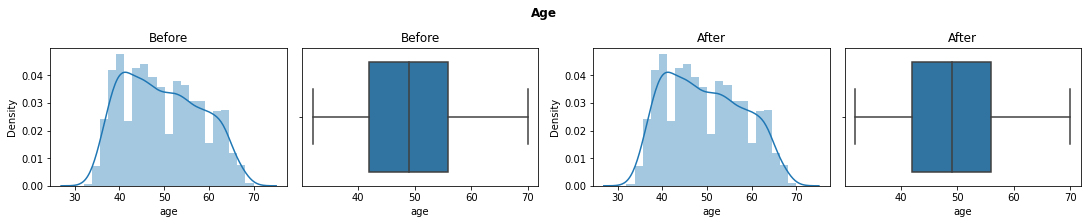

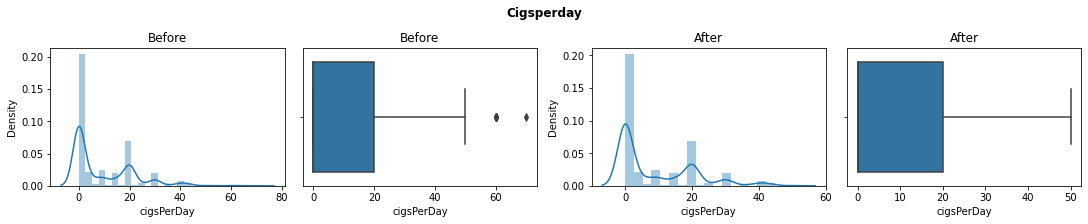

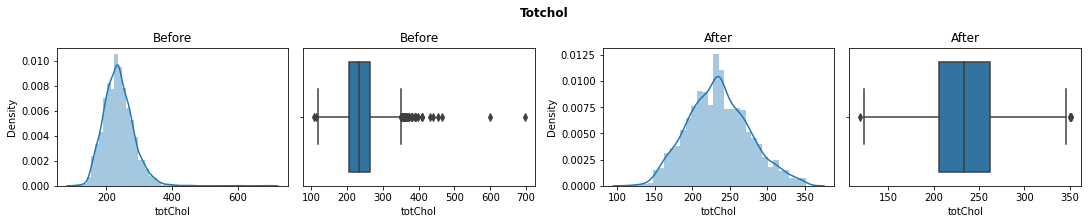

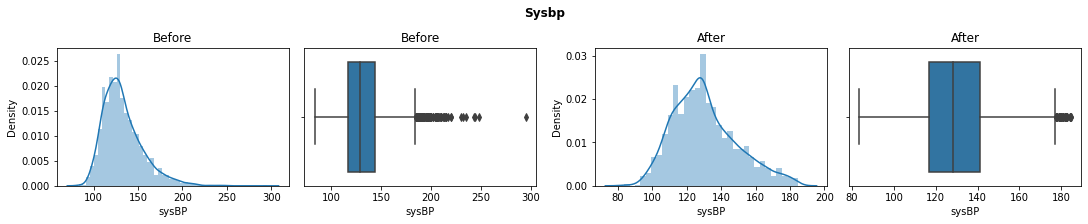

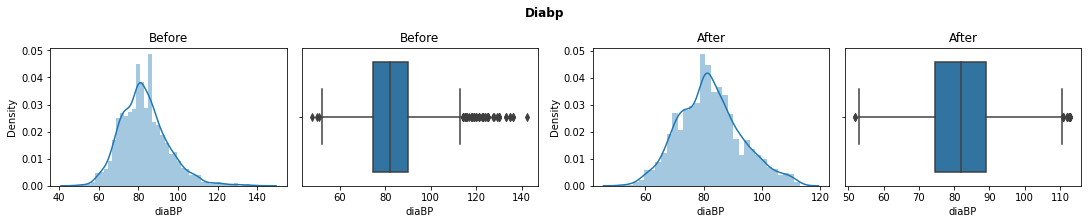

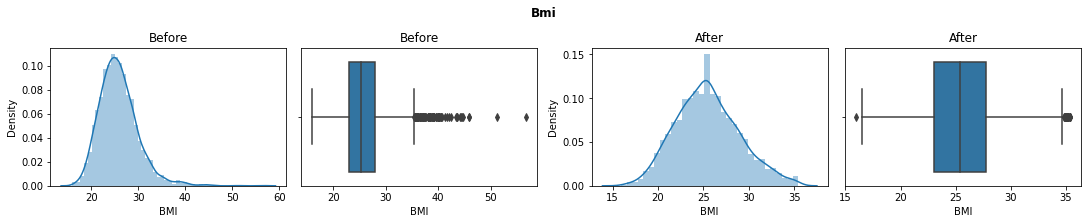

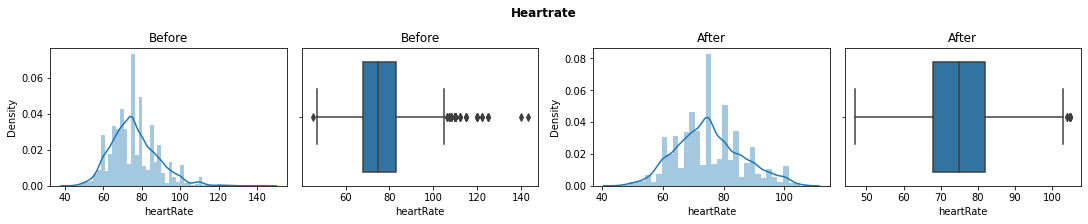

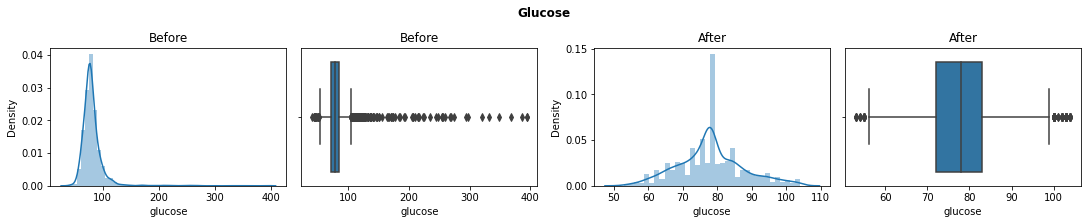

In [ ]:
# Before treating outliers :

for col in numerical_columns:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")


  # After treating outliers :
  
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

## Cleaning and Manipulating Datasets

In [ ]:
# Checking unique value with their counts in categorical features
for col in ['sex', 'is_smoking']:
  print(df[col].value_counts(),'\n')

F    1923
M    1467
Name: sex, dtype: int64 

NO     1703
YES    1687
Name: is_smoking, dtype: int64 



In [ ]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
df = df.replace(encoder)

In [ ]:
# Checking Whether all features are numeric or not
len(df.columns) == len(df.describe().columns)


True

In [ ]:
df.tail(5)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,1,0,0.0,0.0,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,0,0,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


# Univariate Analysis

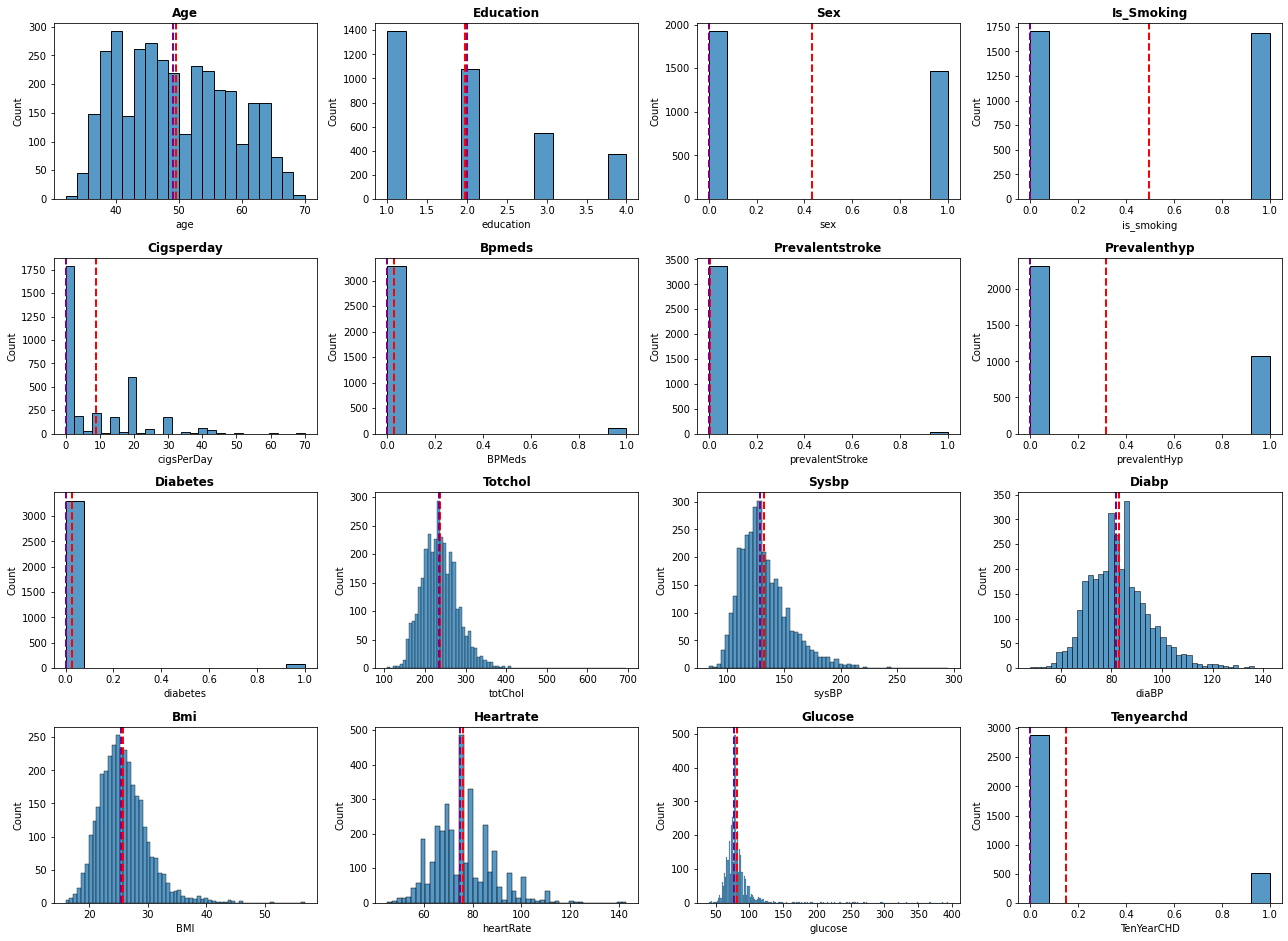

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for n,column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, n+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='purple', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

# Bivariate Analysis

In [ ]:
independent_variable = df.columns

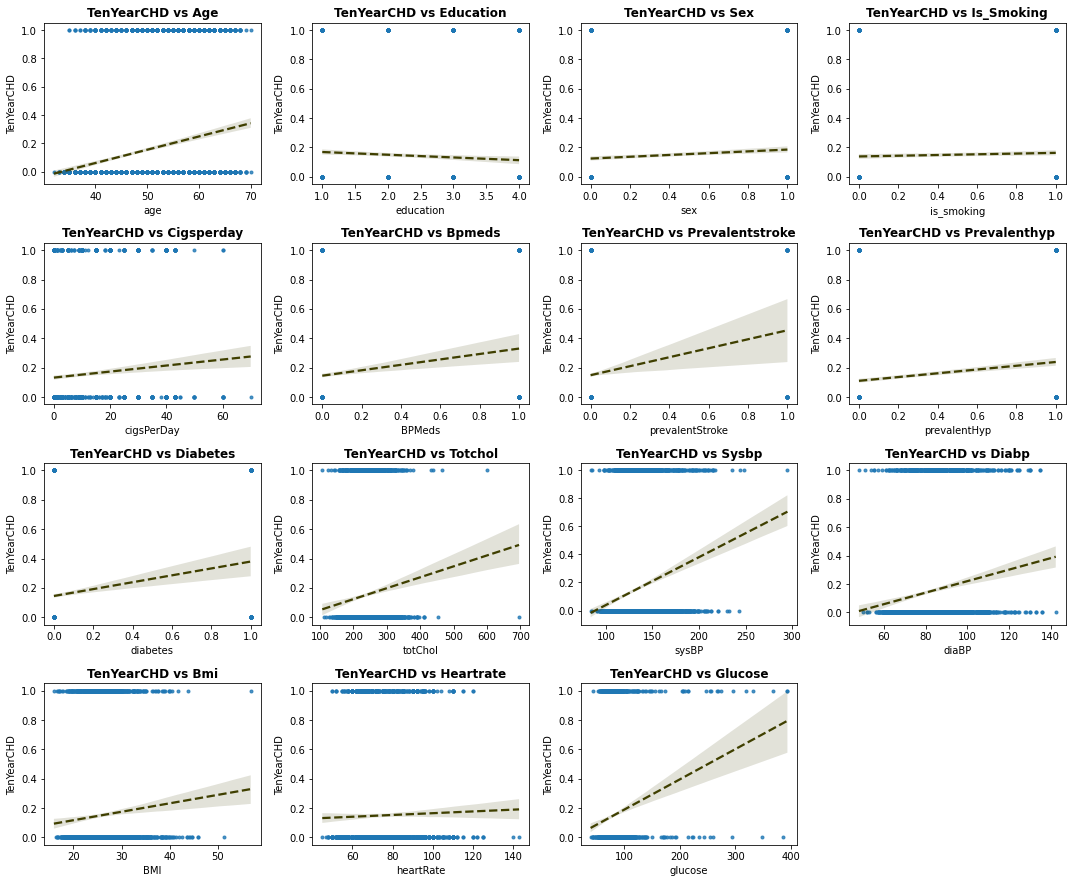

In [ ]:
# Checking Linearity
variables = [i for i in independent_variable if i not in ['TenYearCHD']]

plt.figure(figsize = (15,15))
for index, column in enumerate(variables) :
  plt.subplot(5,4,index+1)
  sns.regplot(data = df, x = column, y = 'TenYearCHD', marker = '.' , line_kws = {'color' : '#3f3f00', 'linestyle':'--'})
  plt.title(f'TenYearCHD vs {column.title()}', weight = 'bold')
  plt.tight_layout()
plt.show();

# MULTIVARIATE ANALYSIS

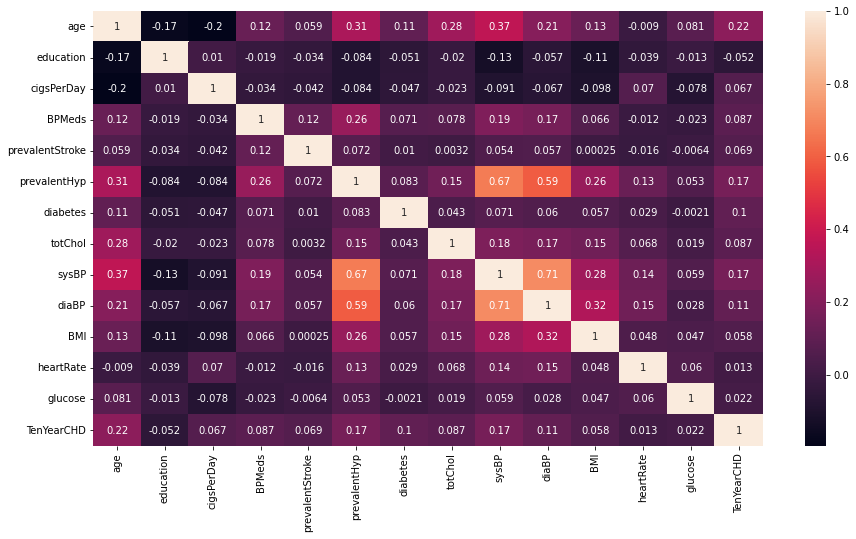

In [ ]:
# Checking multicollinearity 
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True,)

## Age & Sex v/s Risk

Text(0.5, 1.0, 'Male')

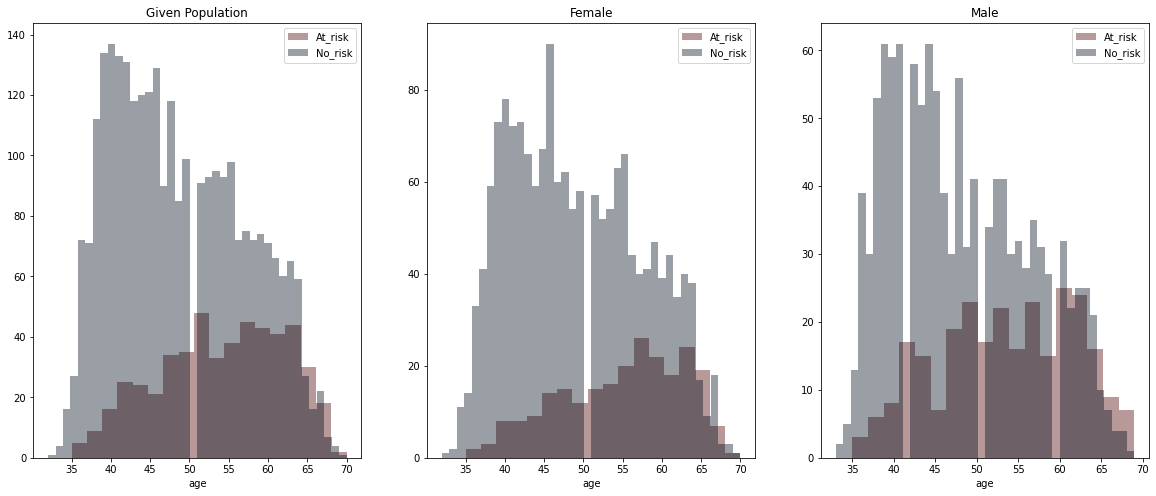

In [ ]:
fig , axes= plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax= sns.distplot(df[df['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[0],color='#4d0000',kde=False)
ax= sns.distplot(df[df['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[0],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Given Population")
women= df[df['sex']==0]
men= df[df['sex']==1]
ax= sns.distplot(women[women['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[1],color='#4d0000',kde=False)
ax= sns.distplot(women[women['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[1],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Female")
ax= sns.distplot(men[men['TenYearCHD']==1].age,bins=18,label='At_risk',ax=axes[2],color='#4d0000',kde=False)
ax= sns.distplot(men[men['TenYearCHD']==0].age,bins=40,label='No_risk',ax=axes[2],color='#000f1e',kde=False)
ax.legend()
ax.set_title("Male")




*  Both women and men lying in Age group of 50 and above having high risk. 
*   women above 55 years are usually at risk.


*   Men above 45 years are usually at risk
*   Men are more likely to have heart disease than women.





## Number of male and female smokers

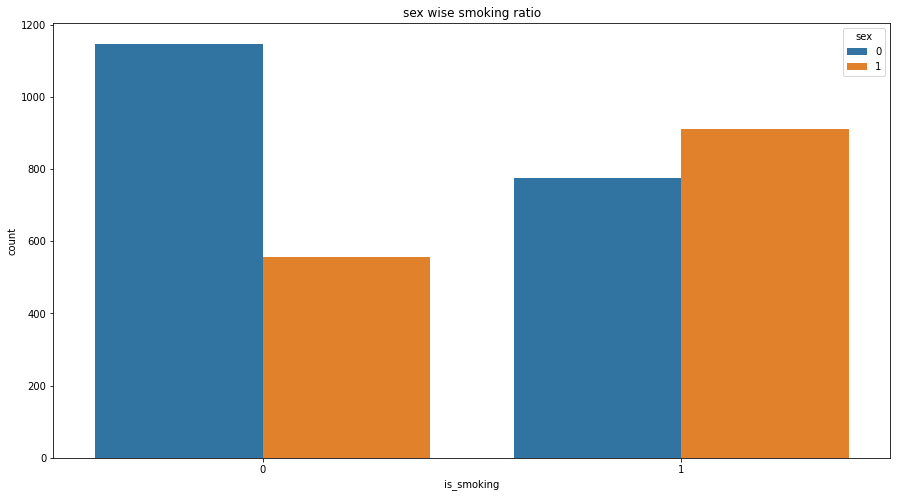

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='is_smoking', hue = 'sex', data=df)
plt.title('sex wise smoking ratio')

plt.show()

**Number of male smoker is higher than female smoker.**

## Age wise smoking ratio

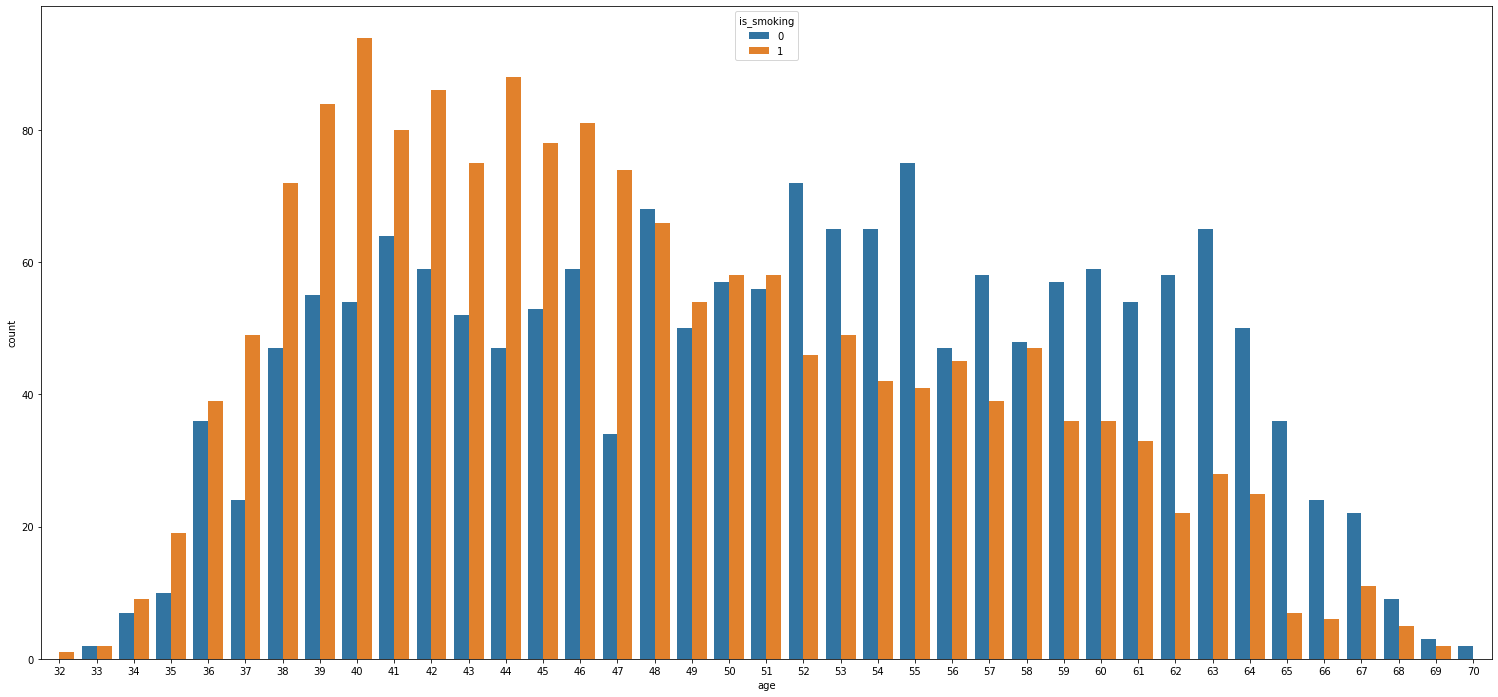

In [ ]:
plt.figure(figsize=(26,12), facecolor='w')
sns.countplot(x="age",data=df,hue="is_smoking")

**Young and middle aged people smokes most.**

## CigsPerDay & Sex v/s Risk

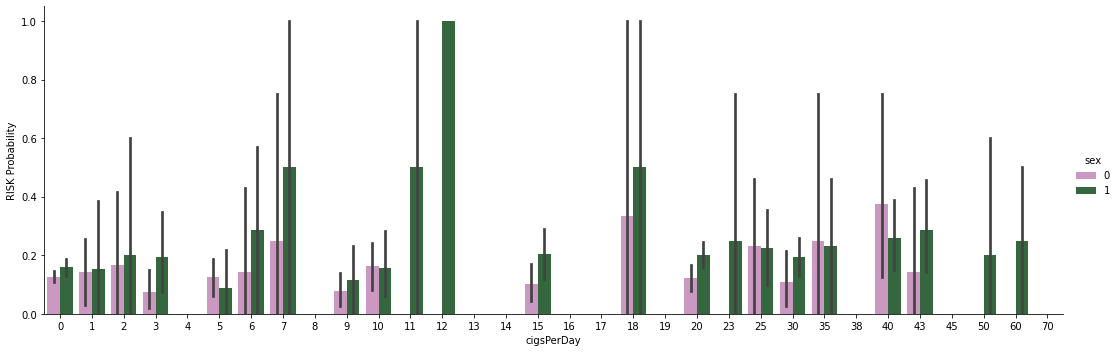

In [ ]:
df['cigsPerDay']=df['cigsPerDay'].astype(int)
g=sns.factorplot('cigsPerDay','TenYearCHD',kind='bar',
                    data=df,hue='sex',aspect=3, palette="cubehelix_r")
g=g.set_ylabels("RISK Probability")

**Male have more tendency of developing risk than females, since smoking levels of male is higher than that of female smokers.**

Person who had a stroke earlier more prone to CHD?

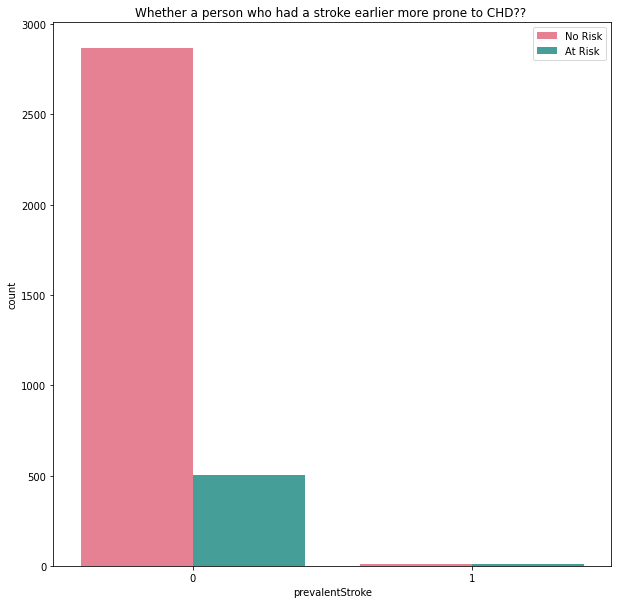

In [ ]:
plt.figure(figsize = (10,10))
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'],palette="husl")
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**person who previously had a heart stroke are more at risk to CHD than those who did not.**

# Data Splitting, Training & Imbalanced data sets

## Analysing & Handling Imbalance Data


Text(0.5, 1.0, 'Imbalanced dataset ')

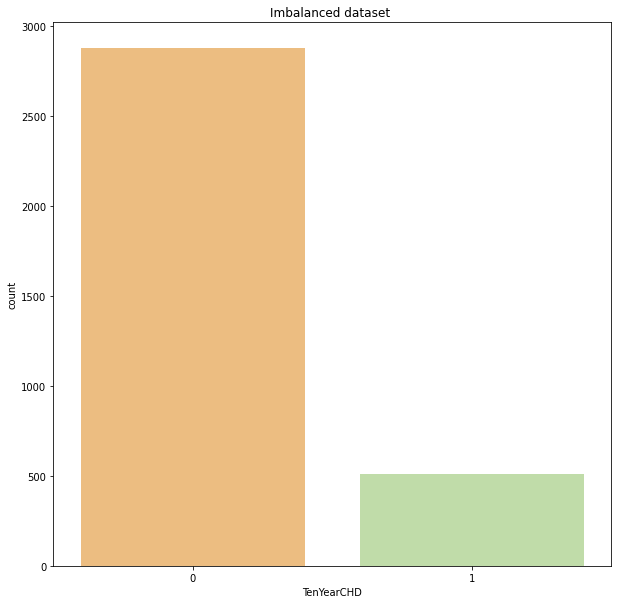

In [ ]:
# Checking the labeled data distribution 
plt.figure(figsize = (10,10))
sns.countplot(data=df1, x='TenYearCHD',palette='Spectral')
plt.title('Imbalanced dataset ')

From the graph we can see that data set is imbalanced.so first we have to balanced the data set.

In [ ]:
df1['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#creating a new copy of the data set
new_df = df.copy()

In [ ]:
# Let us now split
X = new_df.drop(['TenYearCHD'], axis=1)
y = new_df['TenYearCHD']

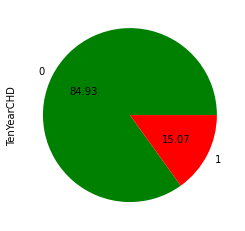

In [ ]:
y.value_counts().plot.pie(autopct='%.2f',colors = ['green','red'])

In [ ]:
#Using SMOTE for oversampling


smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape :', len(new_df))
print('Resampled dataset shape :', len(y_smote))


Original dataset shape : 3390
Resampled dataset shape : 5758


In [ ]:
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled.value_counts()
     

TenYearCHD
0             2879
1             2879
dtype: int64

**Now the data set is balanced.**

In [ ]:
new_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,0,1,3,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#Standardizing the Dataset

standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)
X = pd.DataFrame(X,columns= (new_df.drop(['TenYearCHD'], axis=1).columns))
     

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.3,stratify = y_resampled, random_state=0)

# Model building and Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression

In [ ]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.53211639, -0.05335532, -0.23744981, -0.36069366,  0.69631029,
         0.10365207, -0.05161076, -0.35400835, -0.16836534,  0.07313258,
         0.45717805,  0.14247994,  0.00409733, -0.10992024,  0.38386949]])

In [ ]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6699751861042184
The accuracy on test data is  0.6776620370370371


[[580 284]
 [273 591]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

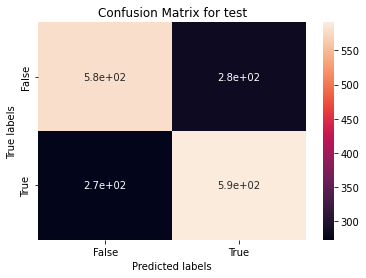

In [ ]:
# Get the confusion matrix for test
labels = ['False', 'True']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[1340  675]
 [ 655 1360]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

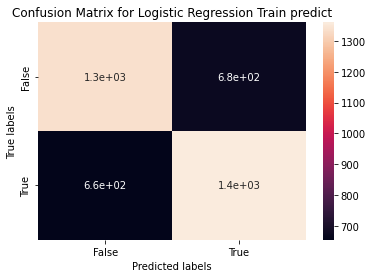

In [ ]:
# Get the confusion matrix for train
labels = ['False', 'True']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
grid={"C":np.logspace(-5,8,15), "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.6669975186104218


In [ ]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6776620370370371
Accuracy score: 0.6776620370370371
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      2015
           1       0.67      0.67      0.67      2015

    accuracy                           0.67      4030
   macro avg       0.67      0.67      0.67      4030
weighted avg       0.67      0.67      0.67      4030



              precision    recall  f1-score   support

           0       0.68      0.67      0.68       864
           1       0.68      0.68      0.68       864

    accuracy                           0.68      1728
   macro avg       0.68      0.68      0.68      1728
weighted avg       0.68      0.68      0.68      1728



[[580 284]
 [273 591]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

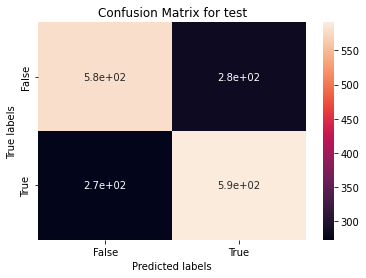

In [ ]:
# Get the confusion matrix for test
labels = ['False', 'True']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Hyperparameter tuning
from sklearn.ensemble import GradientBoostingClassifier
classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Fit the object to train dataset
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

In [ ]:
# predictions
RandomForest_predict = classifier.predict(X_test)

print(classification_report(y_test, RandomForest_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       864
           1       0.81      0.79      0.80       864

    accuracy                           0.80      1728
   macro avg       0.81      0.80      0.80      1728
weighted avg       0.81      0.80      0.80      1728



[[705 159]
 [178 686]]


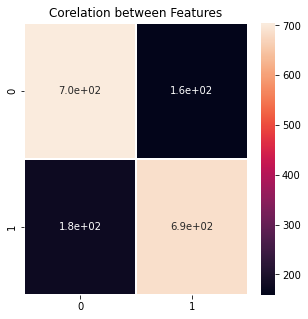

In [ ]:
label=['False','True']
conf_mat = confusion_matrix(y_test, RandomForest_predict)
print(conf_mat)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5)
plt.title('Corelation between Features')
plt.show()

#  K Nearest Neighbour

In [ ]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)
    
    
    # print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96104218 0.88362283 0.87890819 0.83523573 0.84193548
 0.80173697 0.80521092 0.78287841 0.7866005 ]
Test Accuracy:  [0.81886574 0.81944444 0.78414352 0.77256944 0.75636574 0.76157407
 0.74016204 0.75231481 0.72627315 0.73090278]


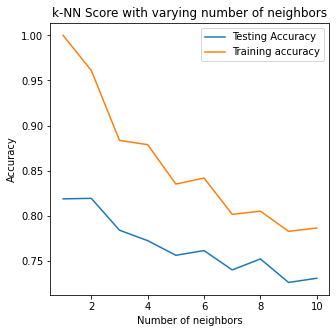

In [ ]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Hyper parameter tuning - KNN
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
knn_cv.best_score_

0.7950372208436726

In [ ]:
knn_cv.best_params_

{'n_neighbors': 1}

In [ ]:
# predictions
knn_predict = knn_cv.predict(X_test)

print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80       864
           1       0.77      0.92      0.84       864

    accuracy                           0.82      1728
   macro avg       0.83      0.82      0.82      1728
weighted avg       0.83      0.82      0.82      1728



[[622 242]
 [ 71 793]]


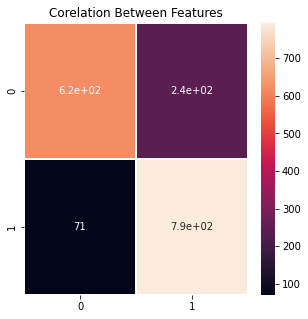

In [ ]:
conf_mat = confusion_matrix(y_test, knn_predict)
print(conf_mat)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5)
plt.title('Corelation Between Features')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
svm_pred = svm_cv.predict(X_test)
print(classification_report(y_test,svm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8215    0.8843    0.8517       864
           1     0.8747    0.8079    0.8400       864

    accuracy                         0.8461      1728
   macro avg     0.8481    0.8461    0.8458      1728
weighted avg     0.8481    0.8461    0.8458      1728



[[764 100]
 [166 698]]


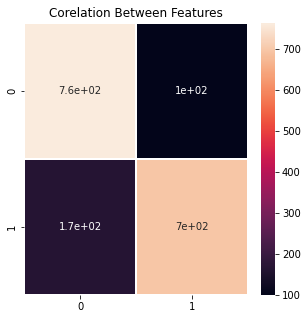

In [ ]:
conf_mat = confusion_matrix(y_test, svm_pred)
print(conf_mat)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5)
plt.title('Corelation Between Features')
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy:', metrics.accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 63.020833333333336
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       864
           1       0.71      0.44      0.54       864

    accuracy                           0.63      1728
   macro avg       0.65      0.63      0.62      1728
weighted avg       0.65      0.63      0.62      1728



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.0657933224657568}

In [ ]:
gs_NB.best_score_

0.5999229287090558

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6012731481481481


In [ ]:
print(classification_report(y_test,predict_test,digits=4))

              precision    recall  f1-score   support

           0     0.5661    0.8669    0.6850       864
           1     0.7160    0.3356    0.4571       864

    accuracy                         0.6013      1728
   macro avg     0.6411    0.6013    0.5710      1728
weighted avg     0.6411    0.6013    0.5710      1728



[[709 155]
 [484 380]]


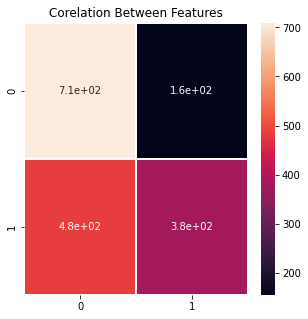

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5)
plt.title('Corelation Between Features')
plt.show()

**Evaluation Metric after hyper parameter tuning**

In [ ]:
models = [['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, grid,cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Naive Bayes', GaussianNB()],
          ['Naive Bayes after Hyperparameter tuning',
           GridSearchCV(estimator=gnb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy')],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
          ]

In [ ]:
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 t

In [ ]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

,Name,Train_accuracy,Test_accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.669975,0.677662,0.671296,0.679953,0.675597
1,Logistic Regression after Hyperparameter Tuning,0.669231,0.677662,0.671296,0.679953,0.675597
2,KNN,0.674938,0.658565,0.518519,0.720257,0.602961
3,KNN after Hyperparameter tuning,0.835236,0.756366,0.644676,0.830104,0.725733
4,Naive Bayes,0.610422,0.630208,0.820602,0.594300,0.689353
5,Naive Bayes after Hyperparameter tuning,0.613151,0.640046,0.821759,0.602716,0.695397
6,SVM,0.772457,0.731481,0.687500,0.753807,0.719128
7,SVM after Hyperparameter Tuning,0.999752,0.846065,0.884259,0.821505,0.851728


In [ ]:
classifiers = [GridSearchCV(logreg, grid, cv = 5),
               KNeighborsClassifier(n_neighbors=5),
               GridSearchCV(estimator=gnb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1, 
                        scoring='accuracy'),
               GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
classifiers_names = ['Logistic Regression','KNN','Naive Bayes','SVM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.692 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   0.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.746 total time=   0.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.700 total time=   0.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.675 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.670 total time=   0.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.658 t

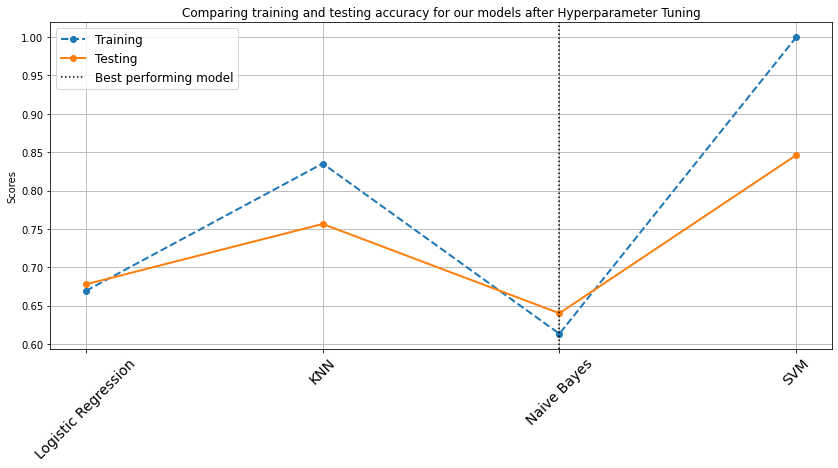

In [ ]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

# Conclusion



*   The major people who are having Cardiovascular Risk are at the age above 50
*   Cardiovascular risk is higher incase of men than women
*   If we consider prevalentStroke person who previously had a heart stroke are more at risk to CHD than those who did not.
*   We can clearly see that, the people who had only basic education i.e., education 1 are at more risk of CVR. And it's gradually decreasing with the increase in education.
*   In glucose level, we can see some outliers in both kinds of people(who are at risk and not at risk). But the people who got high glucose levels are coming into the category of CVR. So we can conclude that it's even one of the factors which may contribute to CVR.
*   The accuracy of some models were increased after hyper parameter tuning.
Between those, if we compare all model accuracy and recall, Naive Bayes is the best performance model.





